In [1]:
pwd

'/mmfs1/data/aglinska/BC-sim/Code'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data = np.load('../reliability-results-hadbad/05_2subtypeTest_adhd_recons.npz')

In [4]:
n = 1000

In [5]:
idx = [np.mod(i,2)!=0 for i in range(1000)]
idx = np.array(idx).astype(int)
idx[0:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [6]:
list(data.keys())

['adhd_data',
 'control_data',
 'adhd_z',
 'adhd_s',
 'adhd_pred',
 'adhd_twins',
 'subtype']

In [7]:
[print(f'{key} | {data[key].shape}') for key in list(data.keys())];

adhd_data | (1000, 64, 64, 64)
control_data | (1000, 64, 64, 64)
adhd_z | (1000, 2)
adhd_s | (1000, 2)
adhd_pred | (1000, 64, 64, 64)
adhd_twins | (1000, 64, 64, 64)
subtype | (1000,)


In [8]:
pcs = PCA(n_components=2).fit_transform(data['adhd_data'].reshape(n,-1))

In [9]:
pcs_twins = PCA(n_components=2).fit_transform((data['adhd_pred']-data['adhd_twins']).reshape(n,-1))

In [10]:
#plt.scatter(pcs_twins[:,0],pcs_twins[:,1],c=idx,alpha=.5)

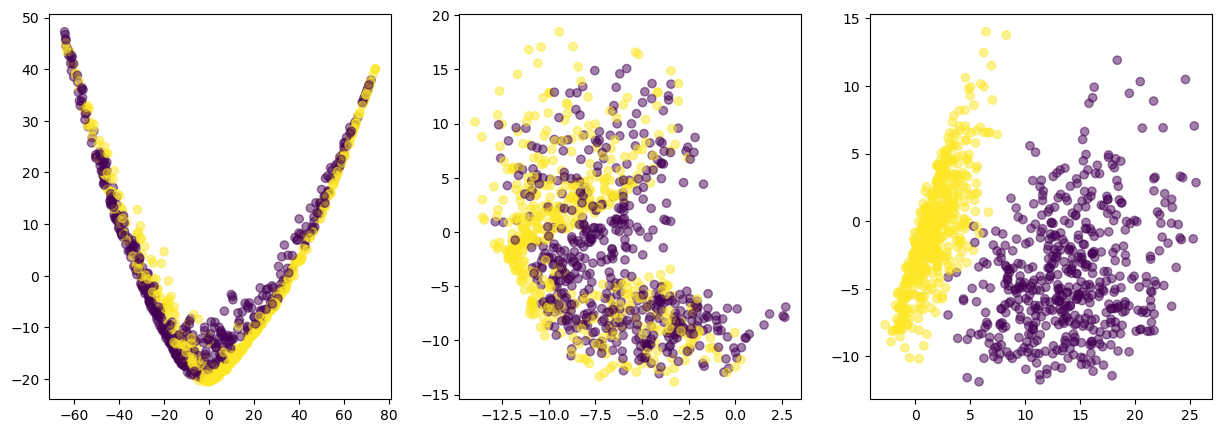

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1);plt.scatter(pcs[:,0],pcs[:,1],c=idx,alpha=.5)
plt.subplot(1,3,2);plt.scatter(data['adhd_z'][:,0],data['adhd_z'][:,1],c=idx,alpha=.5)
plt.subplot(1,3,3);plt.scatter(data['adhd_s'][:,0],data['adhd_s'][:,1],c=idx,alpha=.5)

OrderedDict([('left', <matplotlib.spines.Spine at 0x155520b6d670>),
             ('right', <matplotlib.spines.Spine at 0x155520b6d760>),
             ('bottom', <matplotlib.spines.Spine at 0x155520b6d850>),
             ('top', <matplotlib.spines.Spine at 0x155520b6d940>)])

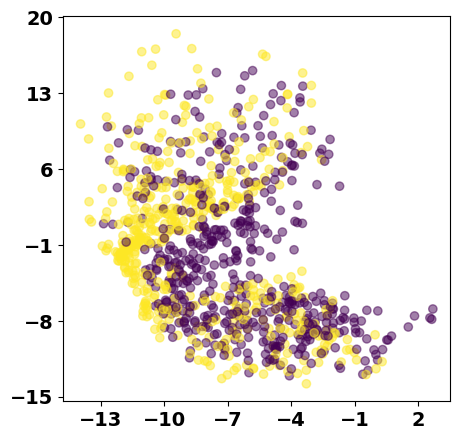

In [73]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(data['adhd_z'][:,0],data['adhd_z'][:,1],c=idx,alpha=.5)
plt.xticks(np.arange(-13,3,3),fontsize=14,fontweight='bold');
plt.yticks(np.linspace(-15,20,6),fontsize=14,fontweight='bold');
# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(3)
# ax.tick_params(width=4)

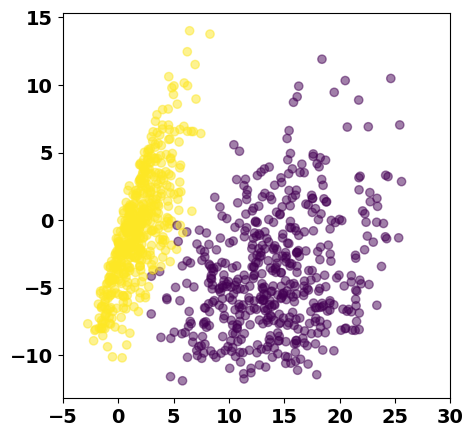

In [79]:
plt.figure(figsize=(5,5))
plt.scatter(data['adhd_s'][:,0],data['adhd_s'][:,1],c=idx,alpha=.5)
plt.xticks(plt.xticks()[0],fontsize=14,fontweight='bold');
plt.yticks([-10,-5,0,5,10,15],fontsize=14,fontweight='bold');

In [13]:
from sklearn.mixture import GaussianMixture

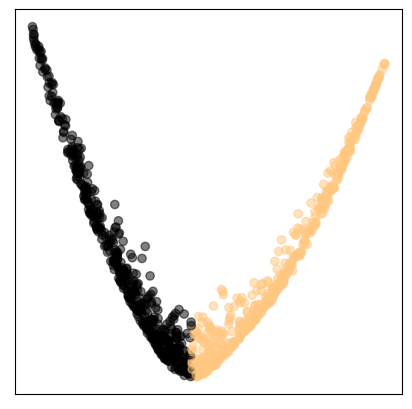

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(pcs[:,0],pcs[:,1],c=GaussianMixture(n_components=2).fit_predict(pcs),alpha=.5,cmap='copper')
plt.xticks([]);
plt.yticks([]);

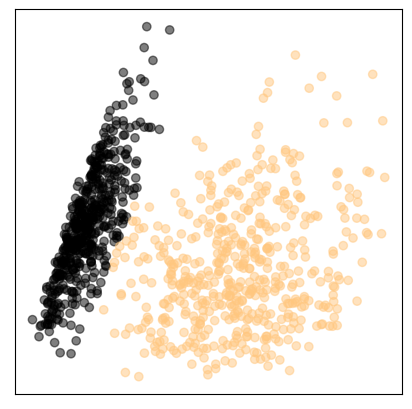

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(data['adhd_s'][:,0],data['adhd_s'][:,1],c=GaussianMixture(n_components=2).fit_predict(data['adhd_s']),alpha=.5,cmap='copper')
plt.xticks([]);
plt.yticks([]);

In [24]:
#plt.scatter(data['adhd_s'][:,0],data['adhd_s'][:,1],c=S,alpha=.5)

In [25]:
# vec1 = [GaussianMixture(n_components=i).fit(data['adhd_s']).aic(data['adhd_s']) for i in np.arange(1,6)]
# plt.plot(np.array(vec1)[0:-1]-np.array(vec1)[1::])
# plt.xticks(np.arange(len(vec1)-1),labels=np.arange(1,5))

In [26]:
# vec1 = [GaussianMixture(n_components=i).fit(pcs).aic(pcs) for i in np.arange(1,6)]
# plt.plot(np.array(vec1)[0:-1]-np.array(vec1)[1::])
# plt.xticks(np.arange(len(vec1)-1),labels=np.arange(1,5))

In [27]:
from sklearn.cluster import KMeans
C = GaussianMixture(n_components=2).fit_predict(pcs)

# diff_cont_1 = data['adhd_data'][idx==0,:,:,:].mean(axis=0)-data['control_data'].mean(axis=0)
# diff_cont_2 = data['adhd_data'][idx==1,:,:,:].mean(axis=0)-data['control_data'].mean(axis=0)

In [28]:
diff_cont_1 = data['adhd_data'][C==0,:,:,:].mean(axis=0)-data['control_data'].mean(axis=0)
diff_cont_2 = data['adhd_data'][C==1,:,:,:].mean(axis=0)-data['control_data'].mean(axis=0)

([], [])

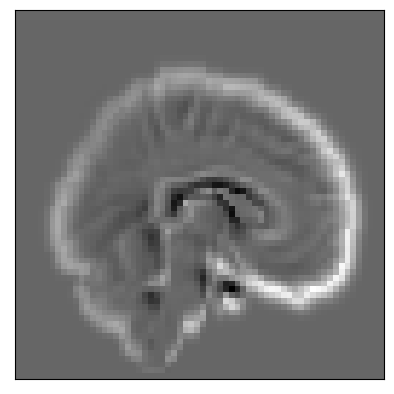

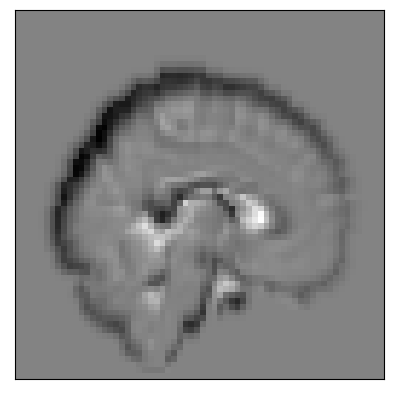

In [29]:
#plt.figure(figsize=(10,5))
# plt.subplot(1,2,1);plt.imshow(np.rot90(diff_cont_1[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])
# plt.subplot(1,2,2);plt.imshow(np.rot90(diff_cont_2[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])

plt.figure();plt.imshow(np.rot90(diff_cont_1[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])
plt.figure();plt.imshow(np.rot90(diff_cont_2[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])

In [30]:
diff_gt = (data['adhd_data']-data['control_data'])

In [31]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1);plt.imshow(np.rot90(diff_gt[S==0,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])
# plt.subplot(1,2,2);plt.imshow(np.rot90(diff_gt[S==1,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])

In [32]:
# plt.figure(figsize=(10,5))
plt.figure();plt.imshow(np.rot90(diff_gt[S==0,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])
plt.figure();plt.imshow(np.rot90(diff_gt[S==1,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])

NameError: name 'S' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
diff = (data['adhd_pred']-data['adhd_twins'])

In [ ]:
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1);plt.imshow(np.rot90(diff[idx==0,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])
# plt.subplot(1,2,2);plt.imshow(np.rot90(diff[idx==1,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])

In [ ]:
plt.figure();plt.imshow(np.rot90(diff[idx==0,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])
plt.figure();plt.imshow(np.rot90(diff[idx==1,:,:,:].mean(axis=0)[32,:,:]),cmap='gray');plt.xticks([]);plt.yticks([])

In [ ]:
np.corrcoef(diff_cont_2.flatten(),diff_gt[idx==0,:,:,:].mean(axis=0).flatten())[0,1]

In [ ]:
np.corrcoef(diff[idx==0,:,:,:].mean(axis=0).flatten(),diff_gt[idx==0,:,:,:].mean(axis=0).flatten())[0,1]